In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [37]:
Insurance_data = pd.read_csv(r"G:\Machine Learning\Medical_Insurance_Cost_Prediction\insurance.csv")

In [38]:
Insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [39]:
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [40]:
Insurance_data.shape

(1338, 7)

Categorical Features:

- Sex
- Smoker
- Region

In [41]:
Insurance_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Distribution of age value

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

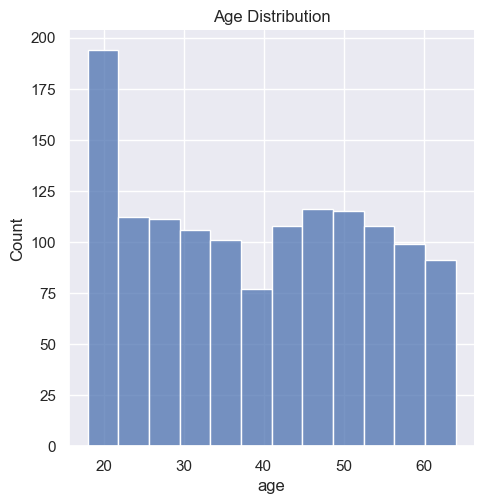

In [42]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(Insurance_data['age'])
plt.title('Age Distribution')
plt.show()

Gender Column

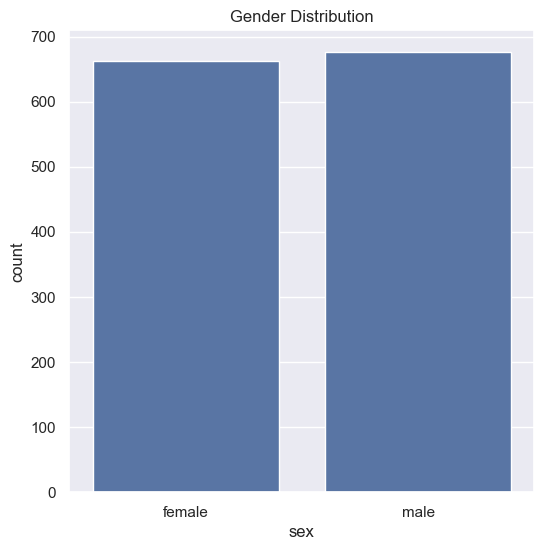

In [43]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=Insurance_data)
plt.title("Gender Distribution")
plt.show()

In [44]:
Insurance_data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

BMI Distribution

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

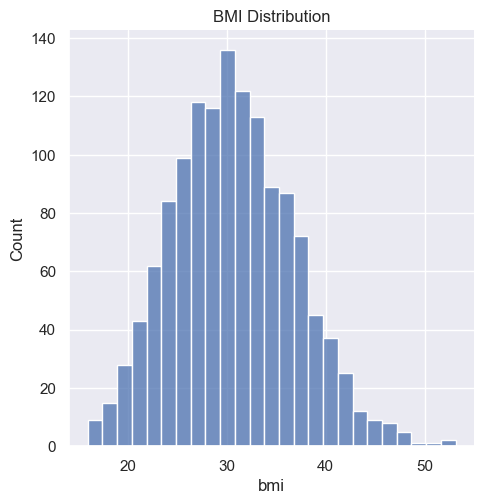

In [45]:
plt.figure(figsize=(6,6))
sns.displot(Insurance_data['bmi'])
plt.title("BMI Distribution")
plt.show()

Children Column

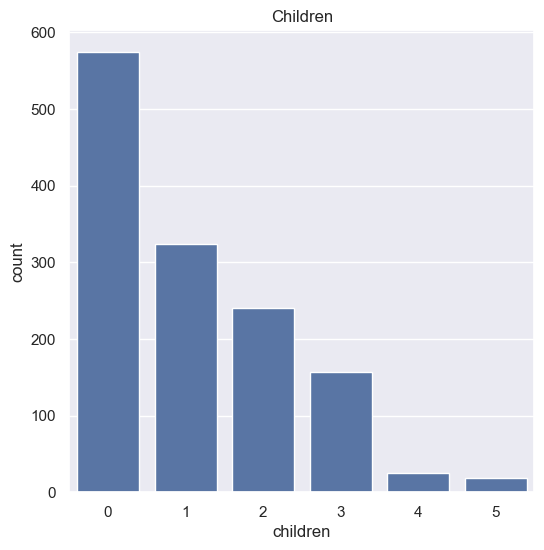

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=Insurance_data)
plt.title("Children")
plt.show()

In [47]:
Insurance_data['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

Smoker Column

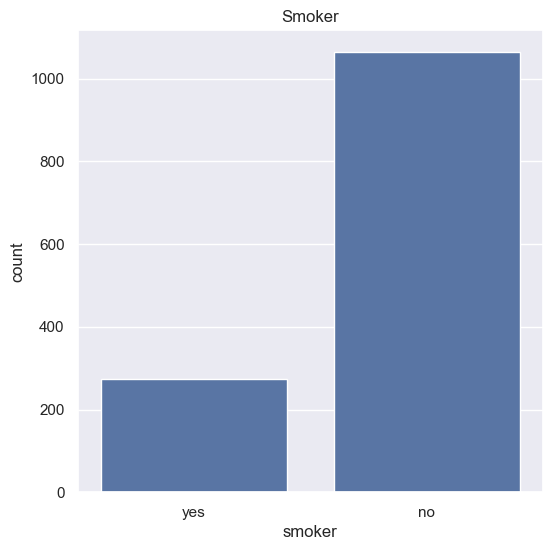

In [48]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=Insurance_data)
plt.title('Smoker')
plt.show()

In [49]:
Insurance_data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

Region Column

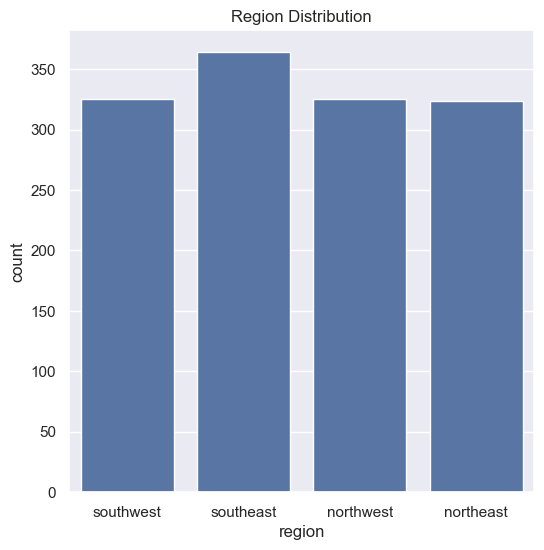

In [50]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=Insurance_data)
plt.title("Region Distribution")
plt.show()

In [51]:
Insurance_data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

Distribution of charges values

C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 600x600 with 0 Axes>

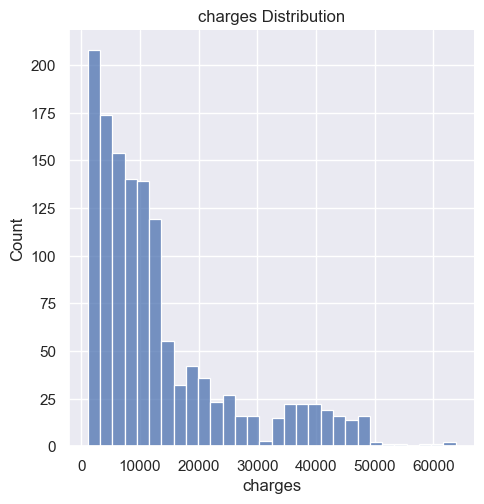

In [52]:
plt.figure(figsize=(6,6))
sns.displot(Insurance_data['charges'])
plt.title("charges Distribution")
plt.show()

Data Pre-Processing

Encoding the categorical features

In [53]:
# Encoding sex column
Insurance_data.replace({'sex':{'male':0,'female':1}},inplace=True)

# Encoding 'smoker' column
Insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)

# Encoding 'region' column
Insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

Splitting the Features and Target

In [54]:
x =Insurance_data.drop(columns='charges',axis=1)
y = Insurance_data['charges']

In [55]:
print(x)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [56]:
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


Splitting the data into Training data & Testing Data

In [57]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

In [58]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


Model Training

Linear Regression

In [59]:
regressor = LinearRegression()

In [60]:
regressor.fit(x_train,y_train)

LinearRegression()

Model Evaluation

In [61]:
training_data_prediction = regressor.predict(x_train)

In [62]:
r2_train = metrics.r2_score(y_train,training_data_prediction)
print("R Squared Value : ",r2_train)

R Squared Value :  0.7528965344026


In [63]:
testing_data_prediction = regressor.predict(x_test)
r2_test = metrics.r2_score(y_test,testing_data_prediction)
print("R Squared Value : ",r2_test)

R Squared Value :  0.7398369165415871


Building a Predictive Model

In [68]:
input_data = (28,0,33.000,3,1,0)

input_data_as_array = np.asarray(input_data)

input_data_replace = input_data_as_array.reshape(1,-1)

prediction = regressor.predict(input_data_replace)
print(prediction)

print("The Insurance cost is USD",prediction)

[6714.00861155]
The Insurance cost is USD [6714.00861155]


C:\Users\ADMIN\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
